<a href="https://colab.research.google.com/github/Nikhita05/Amazon-Clone/blob/main/24july_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr opencv-python-headless matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir('/content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)')

['README.dataset.txt',
 'data.yaml',
 'README.roboflow.txt',
 'test',
 'valid',
 'train']

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
import re
from pathlib import Path

In [ ]:
from ultralytics import YOLO

# Load a pretrained model (you can pick yolov8n, yolov8s, yolov8m, etc.)
model = YOLO('yolov8n.pt')

# Train on your dataset
model.train(data='/content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/data.yaml',
            epochs=50,
            imgsz=640)

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, p

train: Scanning /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/train/labels.cache... 71 images, 0 backgrounds, 0 corrupt: 100%|██████████| 71/71 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 45, len(boxes) = 75. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 6.1±4.9 ms, read: 12.5±7.0 MB/s, size: 48.7 KB)


val: Scanning /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13, len(boxes) = 21. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.16G      1.614      4.533      1.561         20        640: 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         21         21    0.00127      0.381   0.000922    0.00042



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.16G      1.221       3.92      1.198         12        640: 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         21         21    0.00333          1    0.00874    0.00657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.16G      1.007      2.785      1.018         11        640: 100%|██████████| 5/5 [00:01<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         21         21    0.00333          1      0.317      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.16G      1.091       2.09      1.039         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         21         21    0.00333          1      0.312      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.16G     0.9929      1.814     0.9446         21        640: 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         21         21    0.00333          1    0.00652    0.00467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.16G      1.043      1.695     0.9595         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         21         21    0.00333          1     0.0156     0.0125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.16G     0.9927      1.617     0.9565         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         21         21    0.00333          1    0.00561    0.00426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.16G      1.055      1.655      0.973         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         21         21    0.00333          1    0.00548    0.00408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.16G      1.048      1.503     0.9323         14        640: 100%|██████████| 5/5 [00:00<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         21         21    0.00333          1      0.391      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.16G      1.071      1.573     0.9879         13        640: 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         21         21    0.00333          1      0.288      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.16G      1.086      1.526     0.9792          9        640: 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         21         21    0.00333          1      0.361      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.17G      1.089      1.416     0.9919         16        640: 100%|██████████| 5/5 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         21         21    0.00333          1      0.544      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.17G     0.9793      1.396     0.9558         12        640: 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         21         21    0.00333          1      0.788      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.17G     0.9836      1.293     0.9451         18        640: 100%|██████████| 5/5 [00:01<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         21         21          1      0.555      0.906      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.19G      1.024      1.393     0.9473         15        640: 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         21         21          1      0.835      0.981      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.19G     0.9646      1.315     0.9276         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         21         21          1      0.882      0.995      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.19G     0.9343      1.243     0.9178         12        640: 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         21         21          1      0.983      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.21G     0.9018      1.257     0.9326         13        640: 100%|██████████| 5/5 [00:01<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         21         21      0.984      0.952      0.992        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.21G     0.9501      1.247     0.9598         11        640: 100%|██████████| 5/5 [00:01<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         21         21          1      0.898       0.99      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.21G     0.8706      1.213     0.9019         12        640: 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         21         21      0.908      0.952      0.976      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.21G     0.9362      1.226     0.9348         13        640: 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         21         21          1      0.988      0.995      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.22G     0.9327      1.125     0.9395         12        640: 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         21         21          1      0.989      0.995       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.22G     0.8772      1.094      0.896         11        640: 100%|██████████| 5/5 [00:00<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         21         21          1      0.949      0.987      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.22G     0.8043      1.073     0.9029         15        640: 100%|██████████| 5/5 [00:00<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         21         21      0.983      0.905      0.981      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.23G     0.8166      1.012     0.9118         11        640: 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         21         21      0.992      0.905      0.979      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.24G     0.8292     0.9511     0.9154         14        640: 100%|██████████| 5/5 [00:01<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         21         21          1      0.904      0.985      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.24G     0.7937     0.9256     0.8996         10        640: 100%|██████████| 5/5 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         21         21          1      0.943      0.993      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.24G     0.8018     0.9594     0.8978         15        640: 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         21         21          1      0.942      0.995      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.24G     0.7516     0.9092     0.8827         13        640: 100%|██████████| 5/5 [00:00<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         21         21      0.986          1      0.995      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.24G     0.7386     0.9609     0.8885         12        640: 100%|██████████| 5/5 [00:00<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         21         21      0.994          1      0.995      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.24G      0.793     0.9902     0.9113         12        640: 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         21         21      0.993          1      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.24G     0.7341     0.8907     0.8796         18        640: 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         21         21          1      0.991      0.995      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.24G     0.8045     0.9281     0.9113         14        640: 100%|██████████| 5/5 [00:00<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         21         21          1       0.95      0.992      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.24G     0.6569     0.8826     0.8529         13        640: 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         21         21      0.999      0.952      0.993      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.24G     0.6749     0.8241     0.8781         13        640: 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         21         21          1      0.952      0.993      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.24G     0.7079      0.847     0.8969         14        640: 100%|██████████| 5/5 [00:00<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         21         21          1      0.904      0.988       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.24G     0.7112     0.8126     0.8852         14        640: 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         21         21          1      0.905      0.989      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.24G     0.6698     0.7923     0.8741         18        640: 100%|██████████| 5/5 [00:00<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         21         21      0.952      0.952      0.991      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.24G     0.6626     0.8479     0.8794         17        640: 100%|██████████| 5/5 [00:00<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         21         21      0.954      0.985      0.991      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.24G     0.6531     0.7847     0.8621         12        640: 100%|██████████| 5/5 [00:00<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         21         21      0.992          1      0.995      0.723


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.24G     0.6011     0.9406     0.8426          7        640: 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         21         21      0.992          1      0.995      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.24G     0.5936     0.9282     0.8104          7        640: 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         21         21      0.995          1      0.995      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.24G     0.6391     0.9554     0.8701          7        640: 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         21         21      0.995          1      0.995      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.24G     0.5518     0.9226     0.8466          7        640: 100%|██████████| 5/5 [00:00<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         21         21      0.996          1      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.24G     0.5711     0.8954      0.828          7        640: 100%|██████████| 5/5 [00:00<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         21         21      0.996          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.24G      0.544     0.8826     0.8301          7        640: 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         21         21      0.996          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.24G     0.5411      0.849     0.8406          7        640: 100%|██████████| 5/5 [00:00<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         21         21      0.996          1      0.995       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.24G     0.5721     0.8599     0.8497          7        640: 100%|██████████| 5/5 [00:00<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         21         21      0.996          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.24G      0.541     0.8544     0.8274         10        640: 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         21         21      0.997          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.24G     0.5427     0.8323     0.8269          7        640: 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         21         21      0.997          1      0.995      0.805



50 epochs completed in 0.031 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


                   all         21         21      0.996          1      0.995       0.81
Speed: 0.4ms preprocess, 2.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79adb12c9250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run validation
metrics = model.val()

# ✅ Properly access metrics (no parentheses for floats!)
precision    = metrics.box.mp*100
recall       = metrics.box.mr*100
# Safely compute mean F1 score
f1_score_mean = metrics.box.f1.mean()*100

map50        = metrics.box.map50*100
map5095      = metrics.box.map*100
inference_ms = metrics.speed['inference']

# 📊 Display results
print("📦 YOLOv8 Detection Performance Summary")
print(f"🔸 Precision (mean)        : {precision:.3f}")
print(f"🔹 Recall (mean)           : {recall:.3f}")

# Then format it for display
print(f"📈 F1 Score (mean)         : {f1_score_mean:.3f}")

print(f"🎯 mAP@0.5                 : {map50:.3f}")
print(f"🏁 mAP@0.5:0.95            : {map5095:.3f}")
print(f"⚡ Avg. Inference Time     : {inference_ms:.2f} ms/image")

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 31.2±6.3 MB/s, size: 56.5 KB)


val: Scanning /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13, len(boxes) = 21. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


                   all         21         21      0.996          1      0.995      0.811
Speed: 4.4ms preprocess, 9.6ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val10
📦 YOLOv8 Detection Performance Summary
🔸 Precision (mean)        : 99.560
🔹 Recall (mean)           : 100.000
📈 F1 Score (mean)         : 99.780
🎯 mAP@0.5                 : 99.500
🏁 mAP@0.5:0.95            : 81.060
⚡ Avg. Inference Time     : 9.60 ms/image


In [ ]:
results = model.predict(source="/content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images", conf=0.25, save=True)


image 1/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/Bike_MH_12_jpg.rf.7d4b05a5611995f2bbb6bc4b1f1b8b2e.jpg: 640x480 2 Indian_Number_Plates, 12.5ms
image 2/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/Car_AS_02_jpg.rf.33053cf92115cd5549f9e607917b73ae.jpg: 640x480 1 Indian_Number_Plate, 6.3ms
image 3/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/Car_UP_04_jpg.rf.cc5385bd47f59f6ec71a67430b5c10c1.jpg: 640x288 1 Indian_Number_Plate, 9.1ms
image 4/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/ka.jpg: 480x640 1 Indian_Number_Plate, 8.3ms
image 5/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/kl.png: 480x640 1 Indian_Number_Plate, 6.4ms
image 6/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/kl2.jpg: 640x480 1 Indian_Number_Plate, 8.1ms
image 7/8 /content/drive/MyDrive/Indian Car Bike N

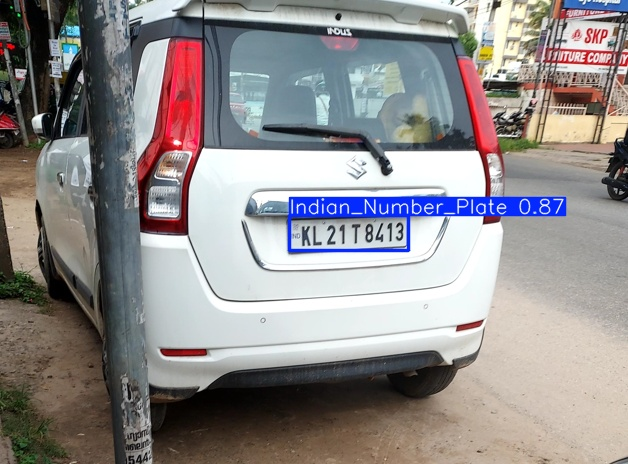

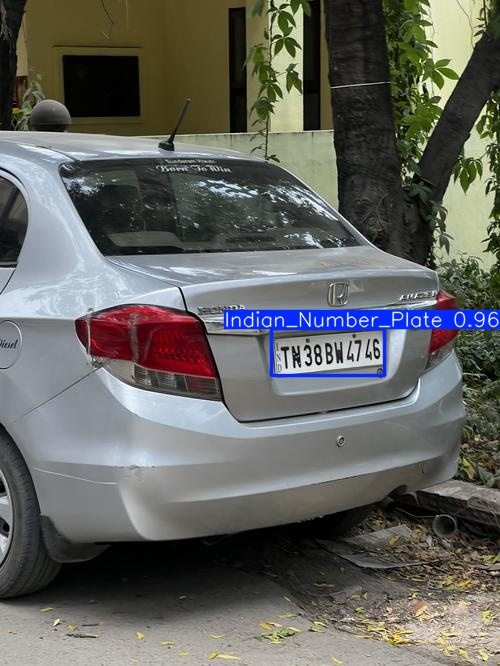

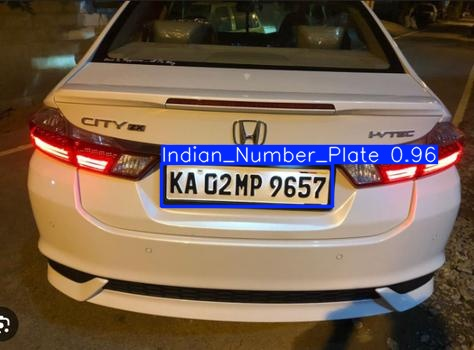

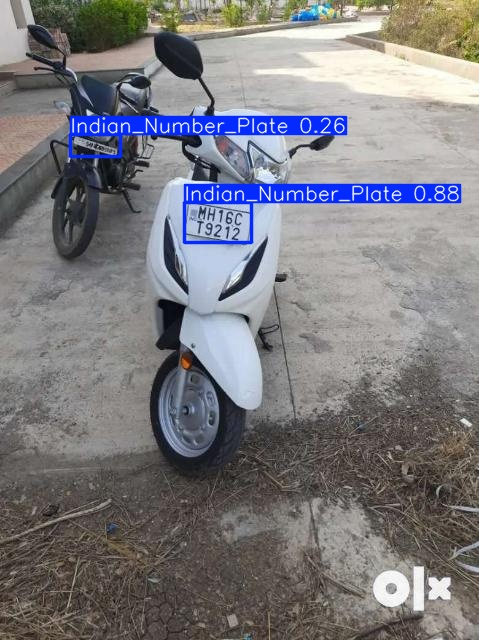

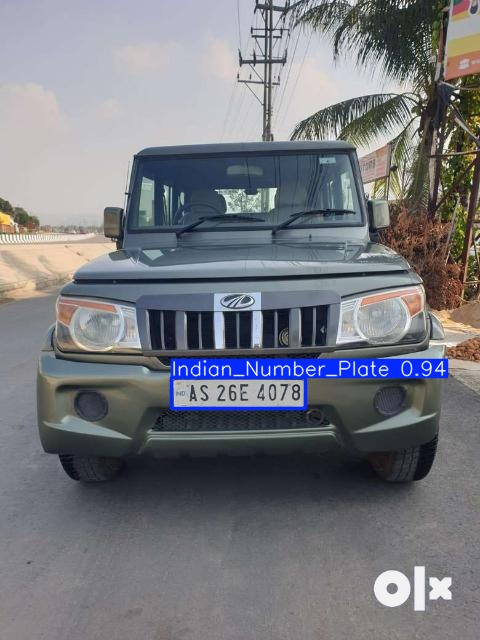

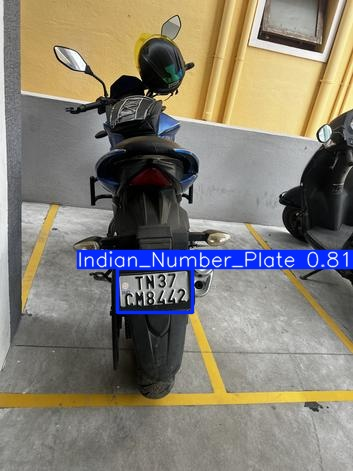

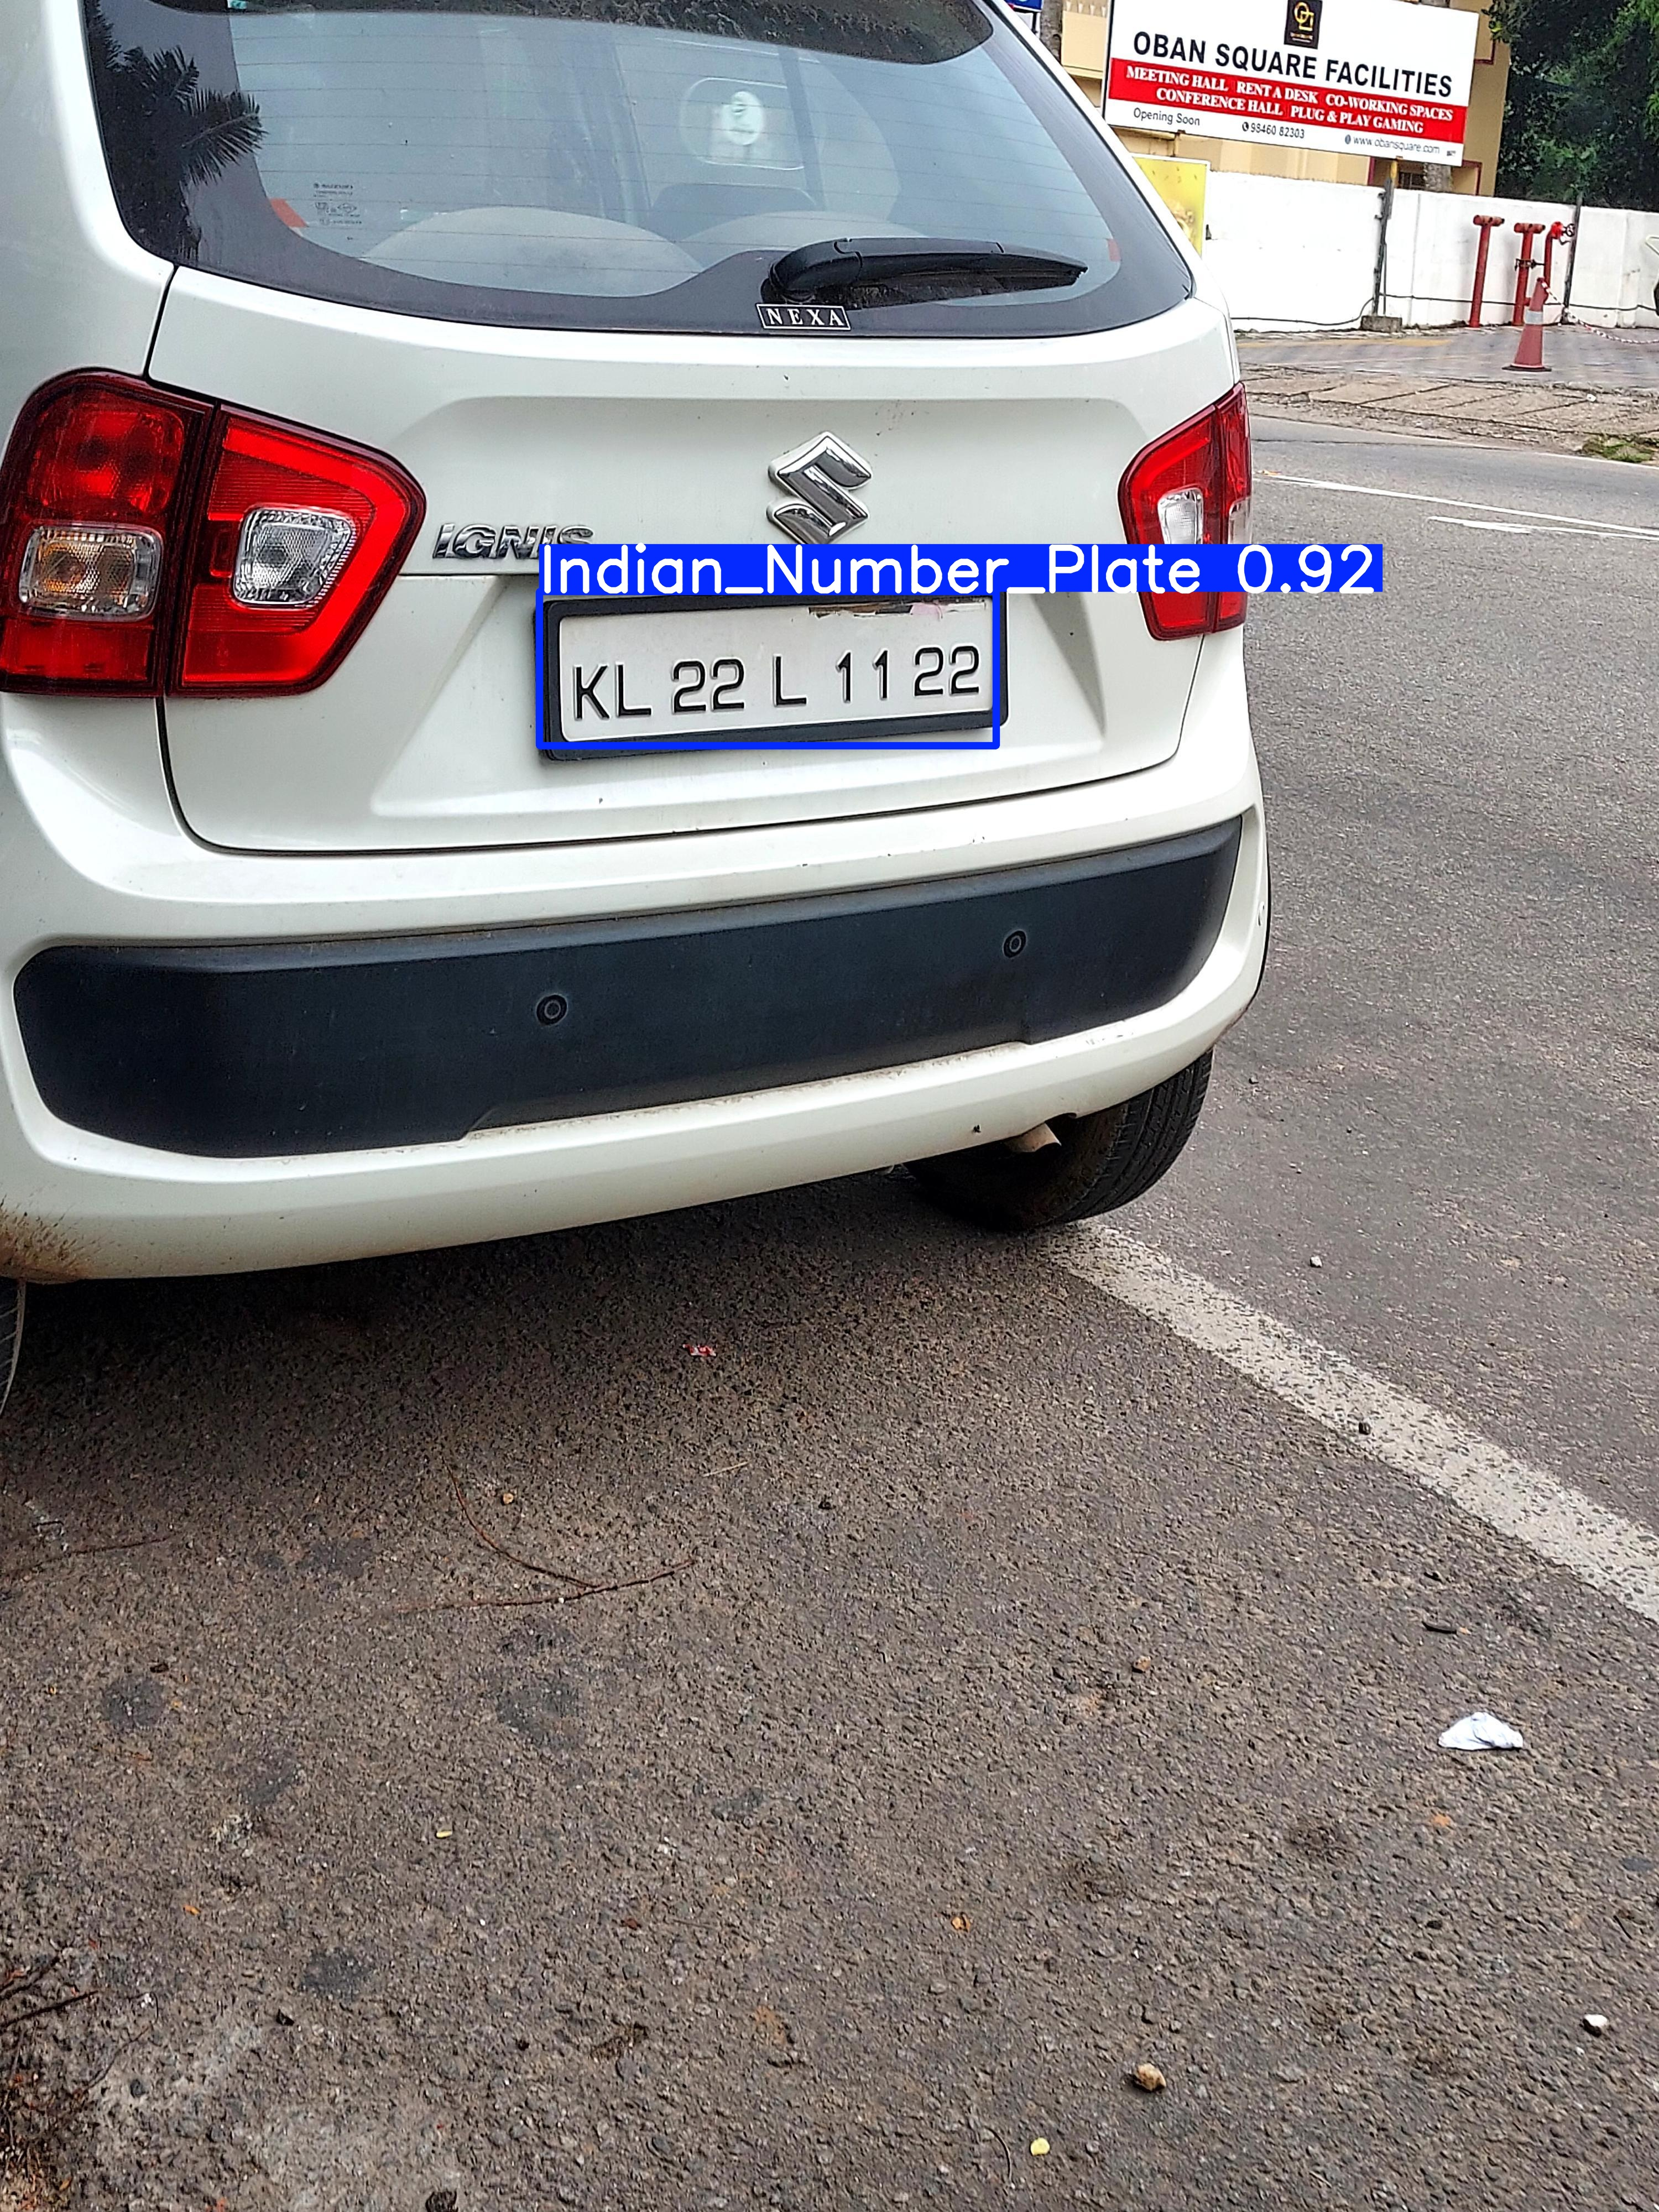

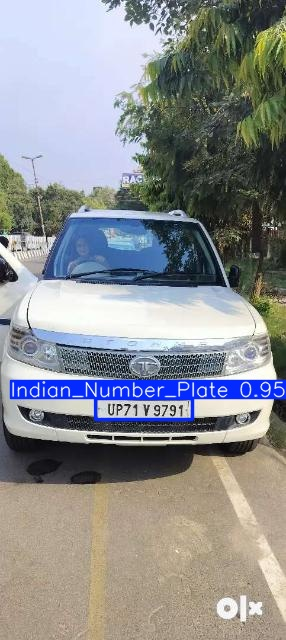

In [ ]:
from IPython.display import Image, display
import os

output_dir = "/content/runs/detect/predict"
for img_name in os.listdir(output_dir):
    if img_name.endswith((".jpg", ".png")):
        display(Image(filename=os.path.join(output_dir, img_name)))

In [ ]:
results = model.predict(source='/content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images', save=False)

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # coordinates
        plate_crop = result.orig_img[y1:y2, x1:x2]
        # Proceed to OCR from here


image 1/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/Bike_MH_12_jpg.rf.7d4b05a5611995f2bbb6bc4b1f1b8b2e.jpg: 640x480 2 Indian_Number_Plates, 18.8ms
image 2/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/Car_AS_02_jpg.rf.33053cf92115cd5549f9e607917b73ae.jpg: 640x480 1 Indian_Number_Plate, 11.4ms
image 3/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/Car_UP_04_jpg.rf.cc5385bd47f59f6ec71a67430b5c10c1.jpg: 640x288 1 Indian_Number_Plate, 12.5ms
image 4/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/ka.jpg: 480x640 1 Indian_Number_Plate, 12.9ms
image 5/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/kl.png: 480x640 1 Indian_Number_Plate, 12.8ms
image 6/8 /content/drive/MyDrive/Indian Car Bike Number Plate.v2i.yolov8 (1)/test/images/kl2.jpg: 640x480 1 Indian_Number_Plate, 12.9ms
image 7/8 /content/drive/MyDrive/Indian Car B

In [ ]:
#Text Recogntio part using ocr

In [ ]:
!pip install pytesseract

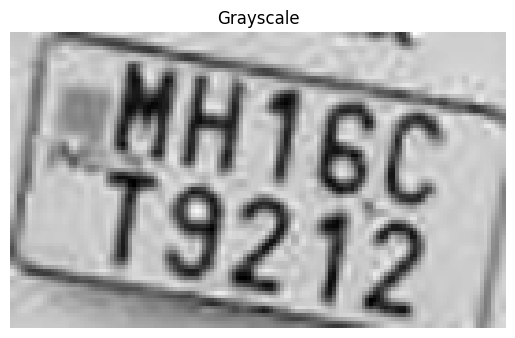

KeyboardInterrupt: 

In [ ]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import itertools

reader = easyocr.Reader(['en'], gpu=False)

# Character correction map
char_map = {'O': '0', 'I': '1', 'Z': '2', 'S': '5', 'B': '8', '|': '1'}

def correct_text(text):
    return ''.join([char_map.get(c, c) for c in text.upper()])

def group_lines(results, y_threshold=15):
    sorted_results = sorted(results, key=lambda r: r[0][0][1])
    lines = []
    for key, group in itertools.groupby(sorted_results, key=lambda r: round(r[0][0][1] / y_threshold)):
        lines.append(sorted(group, key=lambda r: r[0][0][0]))  # sort left to right
    return lines

def try_easyocr_variants(image, show_steps=False):
    versions = []

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    versions.append(("Grayscale", resized))

    sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(resized, -1, sharpen_kernel)
    versions.append(("Sharpened", sharpened))

    contrast = cv2.convertScaleAbs(sharpened, alpha=1.5, beta=0)
    versions.append(("High Contrast", contrast))

    best_text = ""
    best_conf = 0.0
    used_ocr = "EasyOCR"

    for label, v_img in versions:
        results = reader.readtext(v_img)
        if results:
            lines = group_lines(results)
            sorted_results = [item for line in lines for item in line]

            combined = "".join([correct_text(text) for (_, text, conf) in sorted_results if conf > 0.2])
            confs = [conf for (_, _, conf) in sorted_results if conf > 0.2]
            if not confs:
                continue
            avg_conf = np.mean(confs)

            if avg_conf > best_conf:
                best_text = combined
                best_conf = avg_conf

        if show_steps:
            plt.imshow(v_img, cmap='gray')
            plt.title(label)
            plt.axis('off')
            plt.show()

    # Fallback to Tesseract
    if best_conf < 0.5:
        custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
        tesseract_text = pytesseract.image_to_string(sharpened, config=custom_config)
        tesseract_text = correct_text(tesseract_text)
        if len(tesseract_text.strip()) >= 6:
            best_text = tesseract_text.strip()
            best_conf = 0.5  # Estimated
            used_ocr = "Tesseract"

    return best_text, best_conf, used_ocr


# MAIN PLATE RECOGNITION LOOP
MIN_YOLO_CONF = 0.6  # minimum YOLO confidence to accept

for img_index, result in enumerate(results):
    boxes = result.boxes
    image = result.orig_img

    for box_index, box in enumerate(boxes):
        conf = box.conf[0].item()  # YOLO confidence score
        if conf < MIN_YOLO_CONF:
            continue  # skip low confidence detections

        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        plate_crop = image[y1:y2, x1:x2]

        if plate_crop.size == 0:
            continue

        text, confidence, ocr_method = try_easyocr_variants(plate_crop, show_steps=True)

        if text:
            print(f"[Image {img_index + 1} | Plate {box_index + 1}] ✅ Text: {text} (Confidence: {confidence:.2f}, OCR: {ocr_method})")
        else:
            print(f"[Image {img_index + 1} | Plate {box_index + 1}] ❌ No valid plate text detected.")


In [ ]:
#OCR CODE

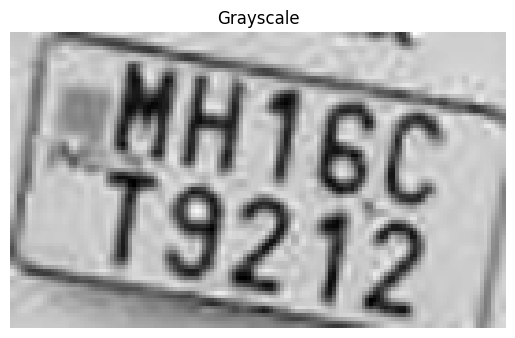

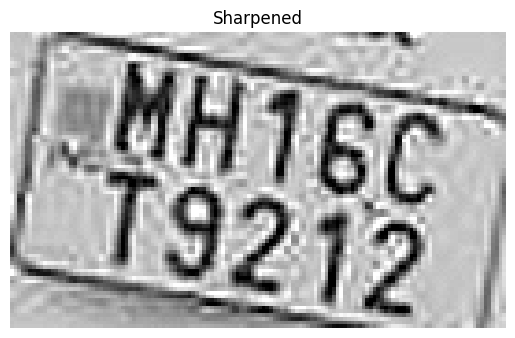

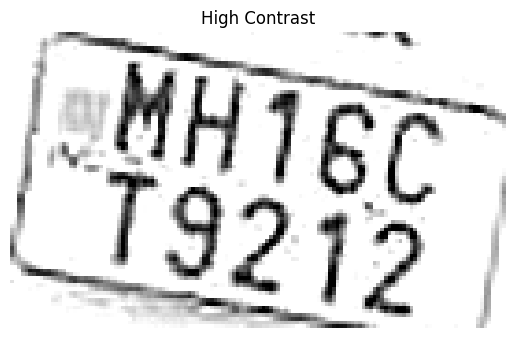

[Image 1 | Plate 1] ✅ Text: MHTEC19212 (Confidence: 0.86, OCR: EasyOCR)


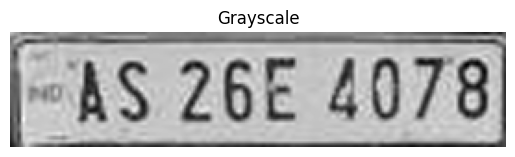

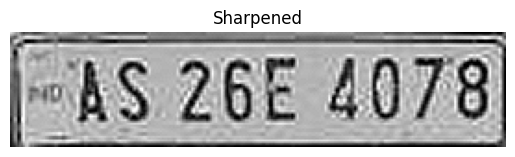

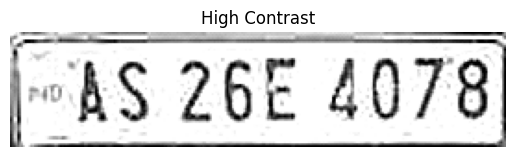

[Image 2 | Plate 1] ✅ Text: A5 26E 4078 (Confidence: 0.62, OCR: EasyOCR)


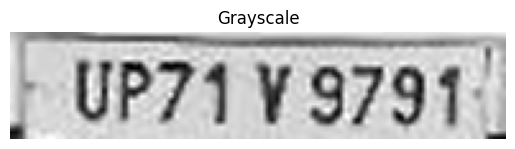

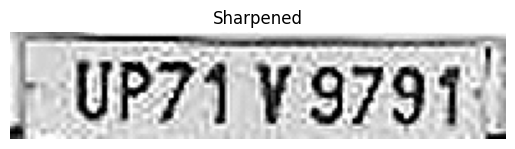

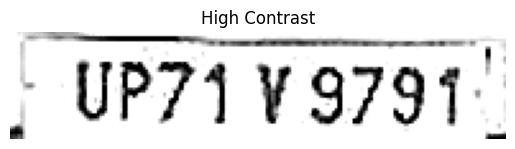

[Image 3 | Plate 1] ✅ Text: UP71 Y 9791 (Confidence: 0.89, OCR: EasyOCR)


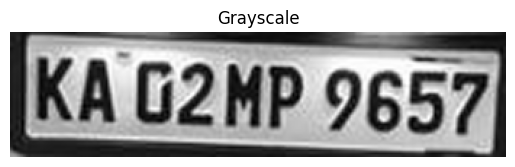

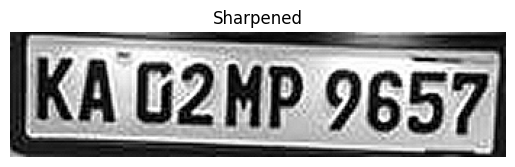

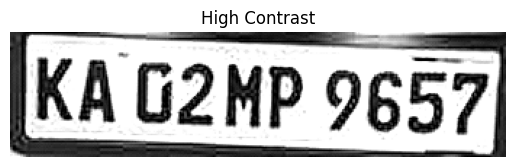

[Image 4 | Plate 1] ✅ Text: KA G2MP 9657 (Confidence: 0.95, OCR: EasyOCR)


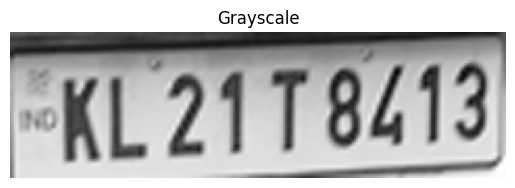

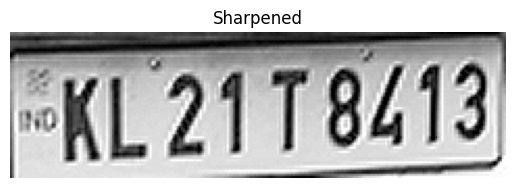

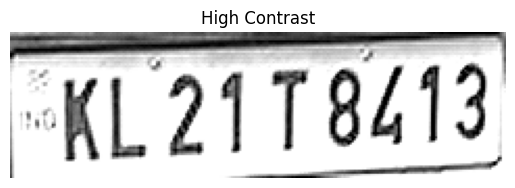

[Image 5 | Plate 1] ✅ Text: KL21T 8413 (Confidence: 0.73, OCR: EasyOCR)


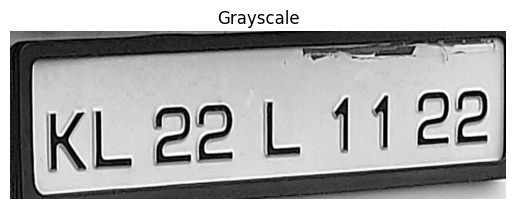

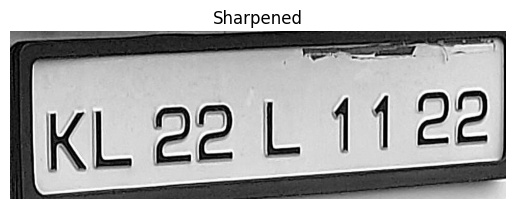

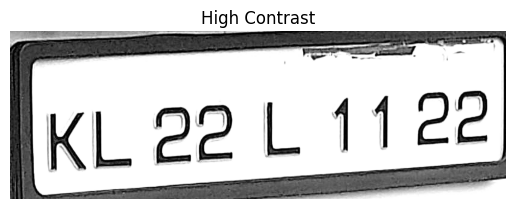

[Image 6 | Plate 1] ✅ Text: KL 22 L1122 (Confidence: 0.98, OCR: EasyOCR)


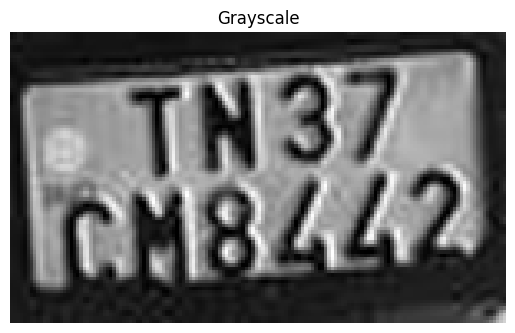

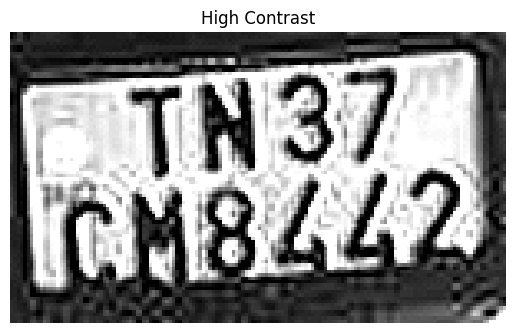

[Image 7 | Plate 1] ✅ Text: 7N37 (Confidence: 0.40, OCR: EasyOCR)


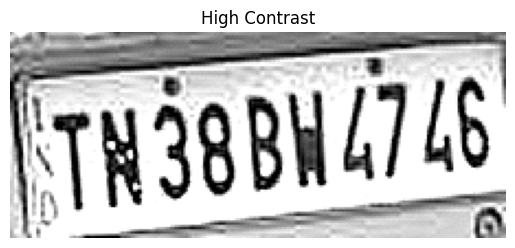

[Image 8 | Plate 1] ✅ Text: 4746 (Confidence: 0.98, OCR: EasyOCR)


In [ ]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import itertools

reader = easyocr.Reader(['en'], gpu=False)

# Character correction map
char_map = {'O': '0', 'I': '1', 'Z': '2', 'S': '5', 'B': '8', '|': '1'}

def correct_text(text):
    return ''.join([char_map.get(c, c) for c in text.upper()])

def group_lines(results, y_threshold=15):
    sorted_results = sorted(results, key=lambda r: r[0][0][1])
    lines = []
    for key, group in itertools.groupby(sorted_results, key=lambda r: round(r[0][0][1] / y_threshold)):
        lines.append(sorted(group, key=lambda r: r[0][0][0]))  # sort left to right
    return lines

def try_easyocr_variants(image, show_steps=False):
    versions = []

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    versions.append(("Grayscale", resized))

    sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(resized, -1, sharpen_kernel)
    versions.append(("Sharpened", sharpened))

    contrast = cv2.convertScaleAbs(sharpened, alpha=1.5, beta=0)
    versions.append(("High Contrast", contrast))

    best_text = ""
    best_conf = 0.0
    used_ocr = "EasyOCR"

    for label, v_img in versions:
        results = reader.readtext(v_img)
        if results:
            lines = group_lines(results)
            sorted_results = [item for line in lines for item in line]

            combined = "".join([correct_text(text) for (_, text, conf) in sorted_results if conf > 0.2])
            confs = [conf for (_, _, conf) in sorted_results if conf > 0.2]
            if not confs:
                continue
            avg_conf = np.mean(confs)

            if avg_conf > best_conf:
                best_text = combined
                best_conf = avg_conf

        if show_steps:
            plt.imshow(v_img, cmap='gray')
            plt.title(label)
            plt.axis('off')
            plt.show()

    # 🔁 Improved Fallback Logic: Tesseract if EasyOCR confidence too low or text too short
    if best_conf < 0.5 or len(best_text.strip()) < 6:
        custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
        tesseract_text = pytesseract.image_to_string(sharpened, config=custom_config)
        tesseract_text = correct_text(tesseract_text)
        if len(tesseract_text.strip()) >= 5:
            best_text = tesseract_text.strip()
            best_conf = 0.5  # Estimated fallback confidence
            used_ocr = "Tesseract"

    return best_text, best_conf, used_ocr


# MAIN PLATE RECOGNITION LOOP
MIN_YOLO_CONF = 0.6  # Minimum YOLO confidence to accept detections

for img_index, result in enumerate(results):
    boxes = result.boxes
    image = result.orig_img

    for box_index, box in enumerate(boxes):
        conf = box.conf[0].item()  # YOLO box confidence
        if conf < MIN_YOLO_CONF:
            continue  # Skip low-confidence boxes

        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        plate_crop = image[y1:y2, x1:x2]

        if plate_crop.size == 0:
            continue

        # Run OCR
        text, confidence, ocr_method = try_easyocr_variants(plate_crop, show_steps=True)

        if text:
            print(f"[Image {img_index + 1} | Plate {box_index + 1}] ✅ Text: {text} (Confidence: {confidence:.2f}, OCR: {ocr_method})")
        else:
            print(f"[Image {img_index + 1} | Plate {box_index + 1}] ❌ No valid plate text detected.")


In [ ]:
import pandas as pd
from difflib import SequenceMatcher

def char_accuracy(gt, pred):
    return SequenceMatcher(None, gt, pred).ratio()

# Load files
gt_df = pd.read_csv("/content/ground_truth_template.csv")       # Image No, Ground Truth
ocr_df = pd.read_csv("/content/ocr_output_results.csv")        # Image No, OCR Text, Confidence, Engine

# Merge on Image No
df = pd.merge(gt_df, ocr_df, on="Image No")

# Evaluate
df["Exact Match"] = df["Ground Truth"] == df["OCR Text"]
df["Char Accuracy"] = df.apply(lambda row: char_accuracy(row["Ground Truth"], row["OCR Text"]), axis=1)

# Summary metrics
exact_match_rate = df["Exact Match"].mean()*100
avg_char_accuracy = df["Char Accuracy"].mean()*100

print("Exact Match Rate:", exact_match_rate)
print("Average Character Accuracy:", avg_char_accuracy)

Exact Match Rate: 62.5
Average Character Accuracy: 83.39285714285715


In [ ]:
import pandas as pd
from difflib import SequenceMatcher

# 🔧 Character-level accuracy function
def char_accuracy(gt, pred):
    return SequenceMatcher(None, gt, pred).ratio()

# 📁 Load Ground Truth and OCR results from Drive
gt_path = "/content/drive/MyDrive/ANPR_Metrics/ground_truth_template.csv"
ocr_path = "/content/drive/MyDrive/ANPR_Metrics/ocr_output_results.csv"

gt_df = pd.read_csv(gt_path)
ocr_df = pd.read_csv(ocr_path)

# 🔗 Merge by Image No
df = pd.merge(gt_df, ocr_df, on="Image No")

# 📊 Evaluate metrics
df["Exact Match"] = df["Ground Truth"] == df["OCR Text"]
df["Char Accuracy"] = df.apply(lambda row: char_accuracy(row["Ground Truth"], row["OCR Text"]), axis=1)

# 🎯 Overall Summary
exact_match_rate = df["Exact Match"].mean() * 100
avg_char_accuracy = df["Char Accuracy"].mean() * 100
avg_confidence = df["Confidence"].mean() * 100

print(f"✅ Exact Match Rate: {exact_match_rate:.2f}%")
print(f"🔠 Avg. Character Accuracy: {avg_char_accuracy:.2f}%")
print(f"📊 Avg. OCR Confidence: {avg_confidence:.2f}%")

# 🔍 Breakdown by Engine (EasyOCR vs Tesseract)
engine_summary = df.groupby("Engine").agg({
    "Exact Match": "mean",
    "Char Accuracy": "mean",
    "Confidence": "mean"
}).reset_index()

# Scale to percentages
engine_summary[["Exact Match", "Char Accuracy", "Confidence"]] *= 100

print("\n📊 Engine-wise Performance Summary:")
print(engine_summary.round(2))